In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup 
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import plotly.offline as py
import plotly.express as px
import cufflinks as cf

In [2]:
def weather_data(data=None):
    """
    param: data a pandas dataframe 
    
    return
    data per month
    """
    
    cols=data[1].columns # take all columns of first row of list data
    
    month = data[2].iloc[0] # take month
    m_time = data[2].iloc[1:-1] # take all data from this month
    
    # We create series pandas for dayofmonth
    if month[0] == 'Jan':
        s=pd.date_range(start='2020-01-01', periods= len(m_time) , freq='D')
    if month[0] == 'Feb':
        s=pd.date_range(start='2020-02-01', periods= len(m_time) , freq='D')
        
    if month[0] == 'Mar':
        s=pd.date_range(start='2020-03-01', periods= len(m_time) , freq='D')
        
    if month[0] == 'Apr':
        s=pd.date_range(start='2020-04-01', periods= len(m_time) , freq='D')
        
        
        
    v = [] # initialize
    v.append(np.array(s)) # append s
    
    # take all data for  'Temperature (Â° F)', 'Dew Point (Â° F)', 'Humidity (%)',
    #   'Wind Speed (mph)', 'Pressure (Hg)'
    for i in range(3, 8):
        c = np.array(data[i].iloc[1:-1,1]) 
        
        v.append(c)
        
    last_feature = np.array(data[8].iloc[1:-1]) # columns precipitation
    
    v.append(last_feature)
    
    vdt = pd.DataFrame() # initialize 
    for i in range(len(cols)):
        vdt[cols[i]] = v[i]
        
    return vdt # pandas dataframe go below to see a result

In [3]:
def read_main_folder(pardir=None):
    """
    param: pardir: the main path folder
    
    return 
    list of file in each folder
    
    """

    folder_file = []
    for dirname, _, filenames in os.walk(pardir):
        gv = []
        for filename in filenames:
            gv.append(os.path.join(dirname, filename))
    
        if gv == []: # to avoid an empty list
            pass
        else:
            folder_file.append(gv)
    
    return folder_file # see the result below

In [4]:
def concatenate_and_save_data(folder=None):
    """
    param: folder: take a path html file
    
    return
    read each html file after concatenate all data per month and then save to csv file
    
    """
    
    value = []
    cities = ['cairo-egypt','new-york','tehraniran','tokyo-japan','milan-italy','tunisia']
    for f in folder:
        dc = pd.read_html(f)
        bc = weather_data(data=dc)
    
        value.append(bc)
        
    con_data = pd.concat(value)
    print(f)
        
    for item in cities:
        if item in f:
            city = item #input('Give a city name correspond to this data §§\n')
    
            datasets = 'data_'
    
            save = datasets + city + '_weather.csv'
        
            con_data.to_csv(save, index=False)
            print('Saving data is done for {} !\n'.format(item))
    
    #return con_data

html_file = '/kaggle/input/new-york/New York City NY Weather History _ Weather Underground (2020-03-24 11_04_39).html'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

In [5]:
#url="https://www.wunderground.com/history/daily/tn/tunis/DTTA"


r = requests.get(url, headers=header)
dfs = pd.read_html(r.text, match='.*')

start = r.text.find('this.playerArray = ') + 19
end = r.text.find("this.currentSite = 'default';")
data = eval(r.text[start:end].replace(';', '').replace('\n', '')) ###erreur 

In [6]:
url="https://storage.googleapis.com/kagglesdsdata/datasets%2F587023%2F1059162%2FNew%20York%20City%20NY%20Weather%20History%20_%20Weather%20Underground%20%282020-03-24%2011_04_39%29.html?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591564703&Signature=iLy4dz1mXgo0tBO1nqGDDctC%2B%2BD7dgVG6bR3y8tFktZrCHe49%2BrMWghC6Lk9WVOcSriZry5UDyIVS21g3kZ%2BnDsi8aRNE1jDFaebBEXOaA%2BR4m31qkTIzh3nJL32SpaK0sVWAwZMrXttVdiHnbYInGr%2FV76bDTxW6SnVN0ZKg4U%2F8BA%2BI1Ci9SlI9j2kPadekLDtvY991BB7fRmIcPu3zh6SOCAmDxv%2BLvkNTVjlSbD0CboGqyVjcYrZBaNxO%2BFeUq0n2VflsJtMUXHTyPCy5J%2FPQjDJ%2Bxi2ymD6QxwkhC0YuePalxGylgSFO0n4PRSl3BlXmpojrI%2FbG%2FM%2FY%2BKhXA%3D%3D"

In [7]:
df = pd.read_html(url) ###erreur 

In [8]:
df1=pd.read_html("La Soukra, Tunisia Weather History _ March.html")
df2=pd.read_html("La Soukra, Tunisia Weather History _ April.html")
df3=pd.read_html("La Soukra, Tunisia Weather History _ May.html")
df4=pd.read_html("La Soukra, Tunisia Weather History _ June.html")

In [9]:
# eda
df3[1].head(3) # the first row 

,Time,Temperature (° F),Dew Point (° F),Humidity (%),Wind Speed (mph),Pressure (Hg),Precipitation (in)
0,May 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...,Max Avg Min 81 70.4 59 82 71.4 61 82 72.3 64 7...,Max Avg Min 54 49.7 46 57 54.4 52 57 54.7 50 6...,Max Avg Min 72 50.0 30 73 56.3 37 77 55.7 35 9...,Max Avg Min 18 9.5 3 18 10.8 3 21 11.6 6 13 6....,Max Avg Min 30.1 30.1 30.0 30.1 30.0 30.0 30.1...,Total 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ...
1,May,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df1[2].iloc[0]

0    Mar
Name: 0, dtype: object

In [11]:
# result for Tunisia March
weather_march=weather_data(data=df1)

In [12]:
# result for Tunisia April
weather_april=weather_data(data=df2)

In [14]:
# result for Tunisia May
weather_June=weather_data(data=df4)

UnboundLocalError: local variable 's' referenced before assignment

In [15]:
weather_tunisia=pd.concat([weather_march,weather_april])

In [16]:
weather_tunisia

,Time,Temperature (° F),Dew Point (° F),Humidity (%),Wind Speed (mph),Pressure (Hg),Precipitation (in)
0,2020-03-01,63.9,45.7,55.1,6.6,30.0,0.00
1,2020-03-02,64.9,49.0,60.4,11.2,29.8,0.00
2,2020-03-03,56.9,42.9,61.1,12.3,29.9,0.00
3,2020-03-04,56.1,45.5,69.4,15.3,29.9,0.00
4,2020-03-05,60.9,50.0,69.0,6.3,29.9,0.00
5,2020-03-06,61.6,47.5,60.5,11.8,29.8,0.00
6,2020-03-07,52.2,43.6,72.8,14.1,29.9,0.00
7,2020-03-08,54.3,44.6,70.0,11.6,28.2,0.00
8,2020-03-09,54.9,45.5,72.0,10.5,30.0,0.00
9,2020-03-10,54.4,45.9,74.2,12.3,30.0,0.00


In [17]:
#result for New york

In [18]:
weather_newyork=weather_data(data=df)

In [19]:
weather_newyork.head()

,Time,Temperature (Â° F),Dew Point (Â° F),Humidity (%),Wind Speed (mph),Pressure (Hg),Precipitation (in)
0,2020-02-01,38.5,35.1,87.5,4.6,29.9,0.01
1,2020-02-02,38.3,30.8,75.2,8.9,29.6,0.02
2,2020-02-03,45.5,33.0,64.4,8.1,29.7,0.05
3,2020-02-04,47.5,40.0,76.1,5.3,29.8,0.00
4,2020-02-05,41.2,28.0,61.3,10.4,29.9,0.01


In [20]:
weather_tunisia.head()

,Time,Temperature (° F),Dew Point (° F),Humidity (%),Wind Speed (mph),Pressure (Hg),Precipitation (in)
0,2020-03-01,63.9,45.7,55.1,6.6,30.0,0.00
1,2020-03-02,64.9,49.0,60.4,11.2,29.8,0.00
2,2020-03-03,56.9,42.9,61.1,12.3,29.9,0.00
3,2020-03-04,56.1,45.5,69.4,15.3,29.9,0.00
4,2020-03-05,60.9,50.0,69.0,6.3,29.9,0.00


### covid data

In [21]:
data=pd.read_csv("covid_19_data.csv")

In [22]:
data.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [23]:
data_tunisia=data[data["Country/Region"]=="Tunisia"]

In [24]:
data_tunisia

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3375,3376,03/04/2020,NaN,Tunisia,2020-03-04T01:33:07,1.0,0.0,0.0
3543,3544,03/05/2020,NaN,Tunisia,2020-03-04T01:33:07,1.0,0.0,0.0
3732,3733,03/06/2020,NaN,Tunisia,2020-03-04T01:33:07,1.0,0.0,0.0
3947,3948,03/07/2020,NaN,Tunisia,2020-03-04T01:33:07,1.0,0.0,0.0
4148,4149,03/08/2020,NaN,Tunisia,2020-03-08T21:13:10,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
31597,31598,05/30/2020,NaN,Tunisia,2020-05-31 02:32:45,1076.0,48.0,950.0
32152,32153,05/31/2020,NaN,Tunisia,2020-06-01 02:32:46,1077.0,48.0,960.0
32706,32707,06/01/2020,NaN,Tunisia,2020-06-02 02:33:08,1084.0,48.0,964.0
33370,33371,06/02/2020,NaN,Tunisia,2020-06-03 02:33:13,1086.0,48.0,965.0


In [25]:
#we convert time to datetime
weather_tunisia['Time'] = pd.to_datetime(weather_tunisia['Time'])
data_tunisia['ObservationDate'] = pd.to_datetime(data_tunisia['ObservationDate'] )

In [26]:
weather_tunisia.head()

,Time,Temperature (° F),Dew Point (° F),Humidity (%),Wind Speed (mph),Pressure (Hg),Precipitation (in)
0,2020-03-01,63.9,45.7,55.1,6.6,30.0,0.00
1,2020-03-02,64.9,49.0,60.4,11.2,29.8,0.00
2,2020-03-03,56.9,42.9,61.1,12.3,29.9,0.00
3,2020-03-04,56.1,45.5,69.4,15.3,29.9,0.00
4,2020-03-05,60.9,50.0,69.0,6.3,29.9,0.00


In [27]:
data_tunisia

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3375,3376,2020-03-04,NaN,Tunisia,2020-03-04T01:33:07,1.0,0.0,0.0
3543,3544,2020-03-05,NaN,Tunisia,2020-03-04T01:33:07,1.0,0.0,0.0
3732,3733,2020-03-06,NaN,Tunisia,2020-03-04T01:33:07,1.0,0.0,0.0
3947,3948,2020-03-07,NaN,Tunisia,2020-03-04T01:33:07,1.0,0.0,0.0
4148,4149,2020-03-08,NaN,Tunisia,2020-03-08T21:13:10,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
31597,31598,2020-05-30,NaN,Tunisia,2020-05-31 02:32:45,1076.0,48.0,950.0
32152,32153,2020-05-31,NaN,Tunisia,2020-06-01 02:32:46,1077.0,48.0,960.0
32706,32707,2020-06-01,NaN,Tunisia,2020-06-02 02:33:08,1084.0,48.0,964.0
33370,33371,2020-06-02,NaN,Tunisia,2020-06-03 02:33:13,1086.0,48.0,965.0


In [28]:
weather_tunisia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 28
Data columns (total 7 columns):
Time                  59 non-null datetime64[ns]
Temperature (° F)     59 non-null object
Dew Point (° F)       59 non-null object
Humidity (%)          59 non-null object
Wind Speed (mph)      59 non-null object
Pressure (Hg)         59 non-null object
Precipitation (in)    59 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 3.7+ KB


##### conversion to float

In [29]:
weather_tunisia['Temperature (° F)'] = weather_tunisia['Temperature (° F)'].astype(float)
weather_tunisia['Dew Point (° F)'] = weather_tunisia['Dew Point (° F)'].astype(float)
weather_tunisia['Humidity (%)'] = weather_tunisia['Humidity (%)'].astype(float)
weather_tunisia['Wind Speed (mph)'] = weather_tunisia['Wind Speed (mph)'].astype(float)
weather_tunisia['Pressure (Hg)'] = weather_tunisia['Pressure (Hg)'].astype(float)
weather_tunisia['Precipitation (in)'] = weather_tunisia['Precipitation (in)'].astype(float)


In [30]:
weather_tunisia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 28
Data columns (total 7 columns):
Time                  59 non-null datetime64[ns]
Temperature (° F)     59 non-null float64
Dew Point (° F)       59 non-null float64
Humidity (%)          59 non-null float64
Wind Speed (mph)      59 non-null float64
Pressure (Hg)         59 non-null float64
Precipitation (in)    59 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.7 KB


In [31]:
start_date  = data_tunisia["ObservationDate"].min()
end_date = data_tunisia.ObservationDate.max()
w_date = weather_tunisia.Time.max()
meteo = weather_tunisia[weather_tunisia.Time == w_date]
print('========== Tunsia Report  {} ==============\n'.format(end_date))
print('number of Confirmed case: {}'.format(data_tunisia.Confirmed.max()))
print('Temperature (°F): {}'.format(weather_tunisia['Temperature (° F)'].values[0]))
print('Dew point (°F): {}'.format(meteo['Dew Point (° F)'].values[0]) )
print('Humidity (%): {}'.format(meteo['Humidity (%)'].values[0]))
print('Wind speed (mph): {}'.format(meteo['Wind Speed (mph)'].values[0]))
print('Pressure (Hg): {}'.format(meteo['Pressure (Hg)'].values[0]))
print('Precipitation (in): {}\n'.format(meteo['Precipitation (in)'].values[0]))

========== Tunsia Report  2020-06-03 00:00:00 ==============

number of Confirmed case: 1087.0
Temperature (°F): 63.9
Dew point (°F): 53.7
Humidity (%): 67.6
Wind speed (mph): 7.1
Pressure (Hg): 30.0
Precipitation (in): 0.0



In [32]:
start_date

Timestamp('2020-03-04 00:00:00')

In [33]:
end_date

Timestamp('2020-06-03 00:00:00')

In [34]:
w_date

Timestamp('2020-04-29 00:00:00')

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


data_tunisia.iplot(x='ObservationDate', y='Confirmed', kind='bar', yTitle= 'Confirmed Cases', xTitle='Date',
            legend=True,
           title='Covid19 in Tunisia')

In [36]:
#plt.bar(data_tunisia["ObservationDate"],data_tunisia["Confirmed"] ,figure=plt.figure(200*140))

In [37]:
plt.rcParams["figure.figsize"] = [80,30]

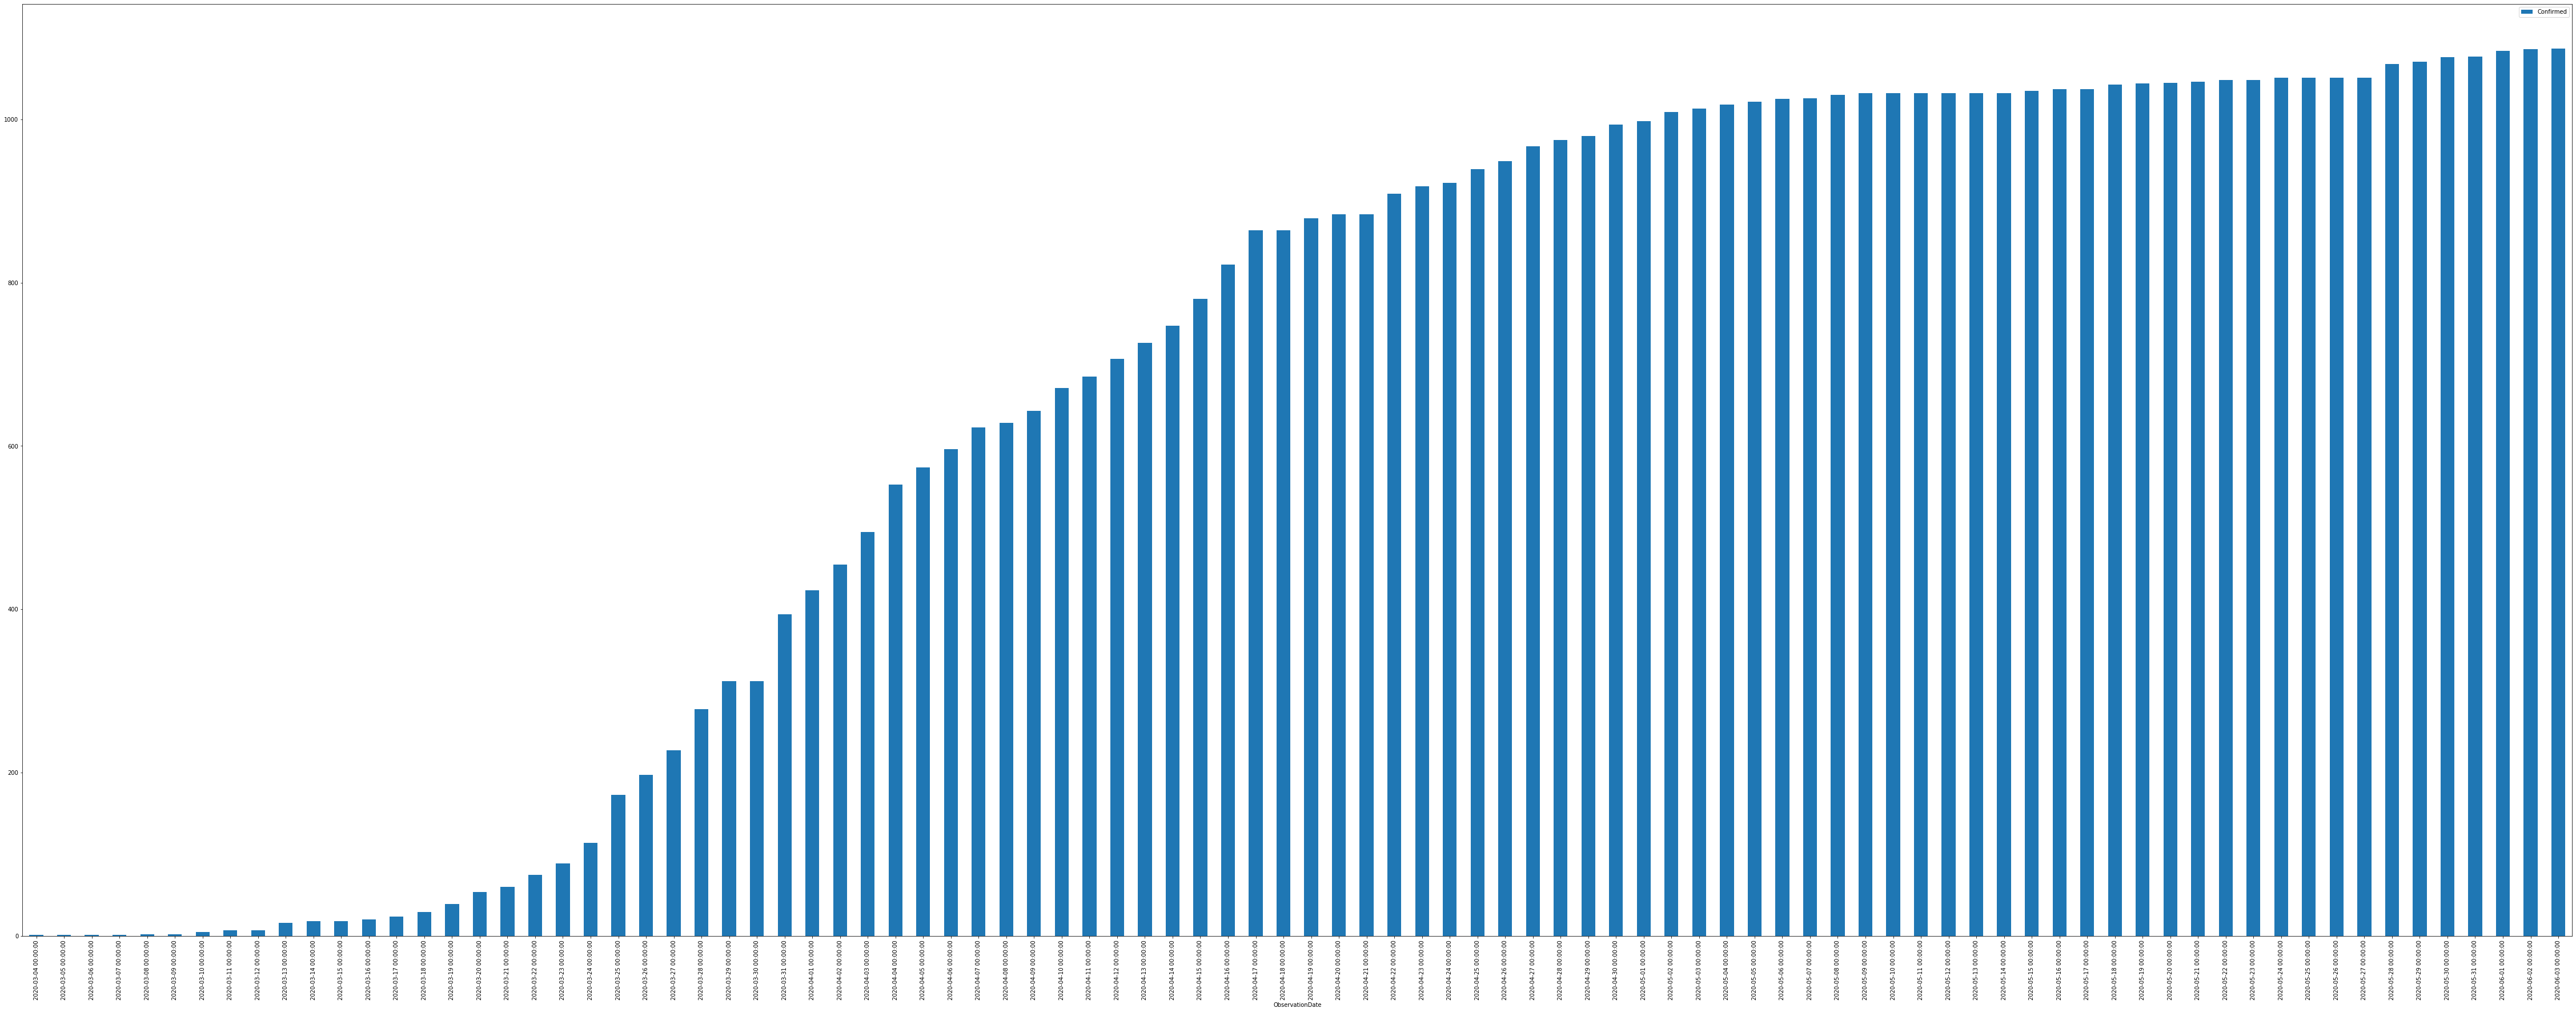

In [38]:
ax =data_tunisia.plot.bar(x='ObservationDate', y='Confirmed')

In [39]:
sth = weather_tunisia[['Time', 'Temperature (° F)','Humidity (%)','Wind Speed (mph)']]\
[weather_tunisia.Time >= '2020-01-01']
sth= sth.reset_index()

cmi = data['Confirmed'].copy()
cmi = cmi.reset_index()

In [40]:
cthw = sth[['Time', 'Temperature (° F)','Humidity (%)','Wind Speed (mph)']].copy()
cthw['Confirmed'] = cmi['Confirmed'].copy()

In [41]:
cthw['Time'] = cthw.Time.apply(lambda x: x.strftime('%Y-%m-%d'))


In [42]:
cthw.head()

,Time,Temperature (° F),Humidity (%),Wind Speed (mph),Confirmed
0,2020-03-01,63.9,55.1,6.6,1.0
1,2020-03-02,64.9,60.4,11.2,14.0
2,2020-03-03,56.9,61.1,12.3,6.0
3,2020-03-04,56.1,69.4,15.3,1.0
4,2020-03-05,60.9,69.0,6.3,0.0


In [43]:
cthw.describe()

,Temperature (° F),Humidity (%),Wind Speed (mph),Confirmed
count,59.000000,59.000000,59.000000,59.000000
mean,60.200000,72.435593,8.167797,19.118644
std,4.757426,6.635011,3.227545,80.503820
min,49.300000,55.100000,3.400000,0.000000
25%,56.750000,68.750000,5.850000,1.000000
50%,59.500000,72.000000,7.600000,2.000000
75%,63.750000,77.600000,10.400000,5.000000
max,70.600000,86.900000,17.900000,444.000000


In [44]:
cthw.corr().style.background_gradient('viridis')

,Temperature (° F),Humidity (%),Wind Speed (mph),Confirmed
Temperature (° F),1,-0.155292,-0.276921,0.0567448
Humidity (%),-0.155292,1,-0.321742,-0.0088685
Wind Speed (mph),-0.276921,-0.321742,1,-0.0385116
Confirmed,0.0567448,-0.0088685,-0.0385116,1


In [45]:
# la corrélation entre Température et confirmed est 0.12 
#entre Humidity et Confirmed est 0.16
#entre wind speed et Confirmed est  0.13

### Checking correlation  using ACP

In [46]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [47]:
Z=cthw.drop(columns=["Time"]).values
X=cthw.drop(columns=["Time"])

In [48]:
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[ 0.78440739 -2.63517276 -0.48992476 -0.22699757]
 [ 0.99640939 -1.82952305  0.94754096 -0.06412841]
 [-0.69960659 -1.72311648  1.29128277 -0.16435559]
 [-0.86920819 -0.46143864  2.22876041 -0.22699757]
 [ 0.1484014  -0.52224239 -0.58367252 -0.23952597]
 [ 0.2968028  -1.81432211  1.13503649  0.08621236]
 [-1.69601599  0.05539325  1.85376935 -0.21446918]
 [-1.25081179 -0.37023301  1.07253798 -0.22699757]
 [-1.12361059 -0.06621425  0.72879618 -0.18941238]
 [-1.22961159  0.26820638  1.29128277 -0.22699757]
 [-0.80560759  1.37787484 -0.30242923 -0.23952597]
 [-0.2544024  -0.27902739 -1.05241135 -0.17688398]
 [ 0.4876046  -0.65905083 -1.17740836 -0.23952597]
 [ 0.1272012  -0.21822363  0.2288081   5.32308249]
 [-0.2968028   0.37461294 -0.55242327 -0.18941238]
 [-0.1484014   0.5570242   0.2288081  -0.23952597]
 [ 0.3604034  -0.3246302   0.63504842 -0.22699757]
 [-0.2544024  -0.46143864 -0.83366656 -0.21446918]
 [-0.72080679  0.45061763 -0.70866954 -0.23952597]
 [ 0.1484014  -0.26382645  0.76

In [49]:
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [50]:
coord = acp.fit_transform(Z)

In [51]:
print(acp.n_components_)

4


In [52]:
n=4
p = Z.shape[1]

In [53]:
print(acp.explained_variance_)


[1.38505598 1.1883432  0.99574247 0.49982386]


In [54]:
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.03879198 0.8912574  0.74680685 0.3748679 ]


In [55]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

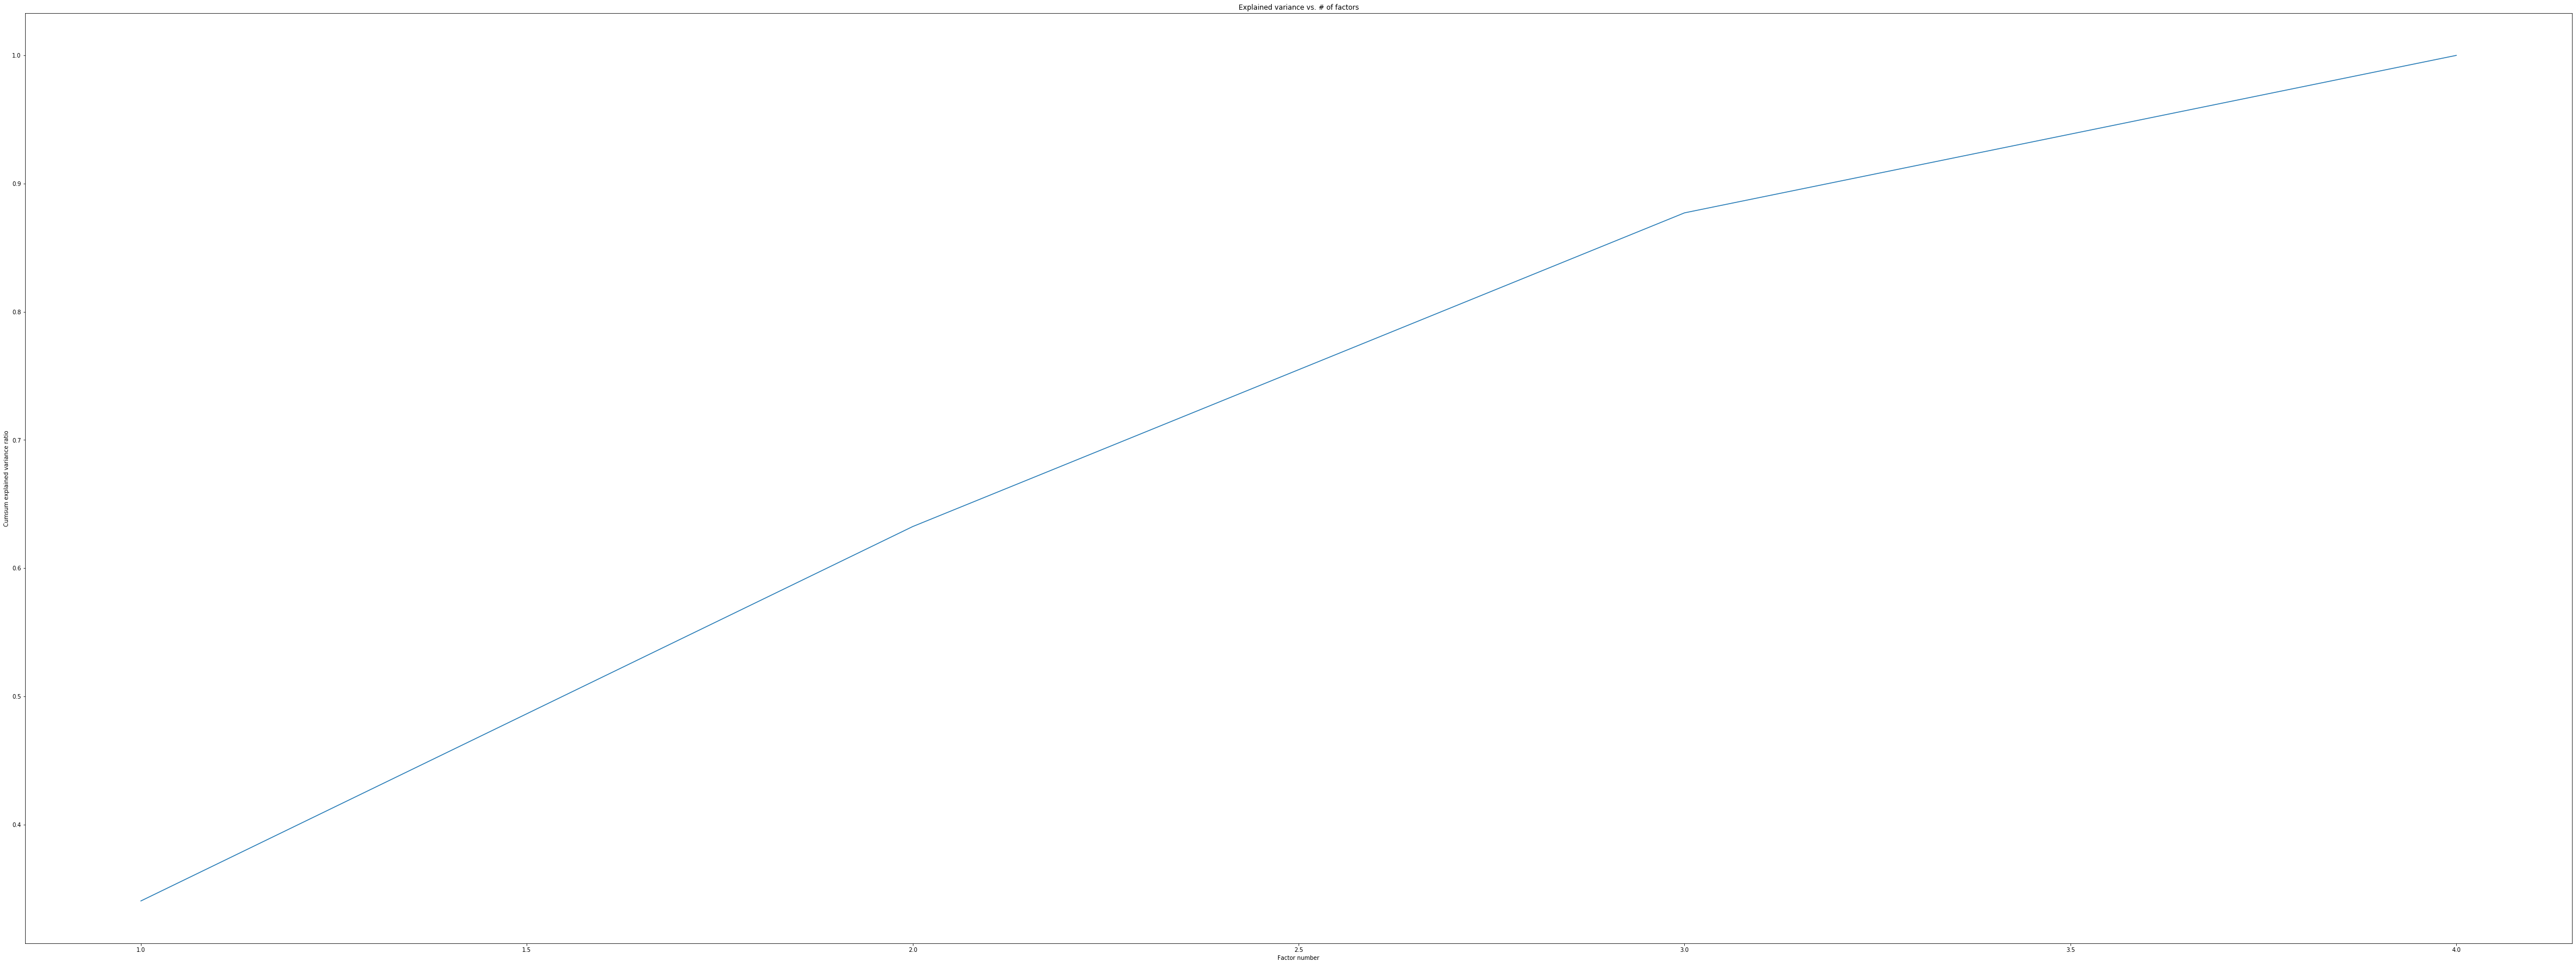

In [56]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [57]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]


In [58]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


   Val.Propre    Seuils
0    1.038792  2.083333
1    0.891257  1.083333
2    0.746807  0.583333
3    0.374868  0.250000


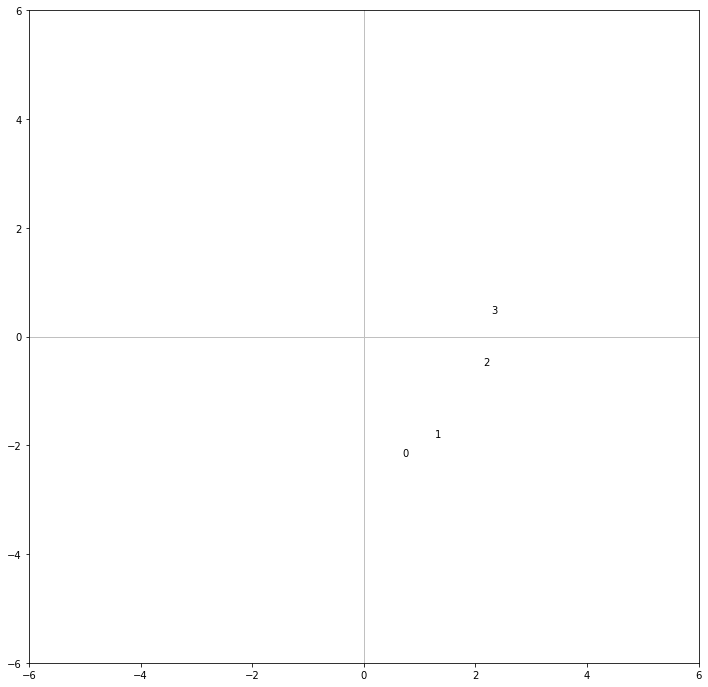

In [59]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


In [60]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[-3.91404518e-01 -6.75723815e-01 -2.26705331e-01  3.18960118e-01]
 [-5.17975755e-01  6.03921148e-01  1.02845713e-01  3.45447765e-01]
 [ 7.74645030e-01  1.76981462e-02  9.35132168e-02  3.92171092e-01]
 [-1.31227596e-01 -2.63857442e-01  8.22246669e-01  1.32511677e-04]]


In [61]:
plt.rcParams["figure.figsize"] = [8,8]

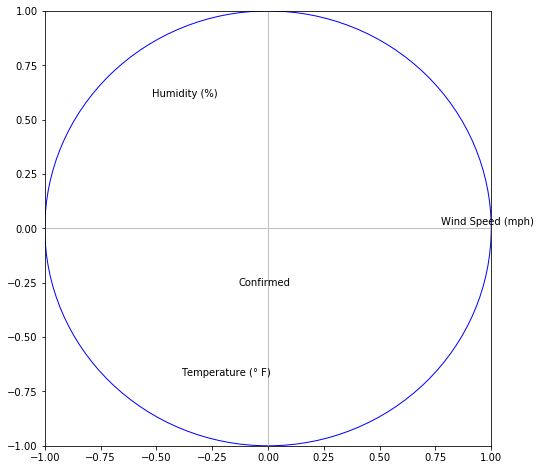

In [62]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


In [67]:
import plotly.io as pio
pio.renderers.default='notebook'

In [72]:
size = cthw['Temperature (° F)'].pow(0.4)
fx = px.scatter(cthw, x='Humidity (%)', y='Wind Speed (mph)', hover_name='Time',
          title='Relation between Humidity-Wind Speed in Milano', color='Confirmed',
          size='Confirmed')
fx.write_html('first_figure.html', auto_open=True)

We can see that despite the small correlation that exists between these variables we find that the number of affected cases increases per day while humidity increases.

In [65]:
fy = px.scatter(cthw, x='Humidity (%)', y='Confirmed', hover_name='Time',
          title='Relation between Humidity-Confirmed in Tunisia', color='Wind Speed (mph)',
          size = 'Confirmed')
fy.write_html('first_figure.html', auto_open=True)

In [66]:
fp = px.scatter(cthw, y='Wind Speed (mph)', x='Confirmed', hover_name='Time',
          title='Relation between Wind Speed-Confirmed in Tunisia', color='Humidity (%)',
          size = 'Confirmed')
fp.update(layout_coloraxis_showscale=False)
fp.write_html('first_figure.html', auto_open=True)

In [71]:
fp = px.scatter(cthw, y='Temperature (° F)', x='Confirmed', hover_name='Time',
          title='Relation between Temperature-Confirmed in Tunisia', color='Temperature (° F)',
          size = 'Confirmed')
fp.update(layout_coloraxis_showscale=False)
fp.write_html('first_figure.html', auto_open=True)

### l'allure du nuage de points montre qu'il n'y a pas de corrélation entre  les deux variables Confirmed et Humidity , de meme pour les deux variables  Confirmed et Wind Speed
